                                   SOLIMO RAJAB
                                   REGNO 2022/HD05/1486U
                                   SNO 2200701486
                                   Computer vision project
                                   End of Semester

In [1]:
import os
import cv2
import glob
import torch
import keras
import shutil
import random
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image
from skimage.io import imread
%matplotlib inline
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torchvision
from torchvision import datasets, transforms, models
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Softmax
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization, Dropout, Flatten, Dense, Reshape
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint,LearningRateScheduler
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset =datasets.ImageFolder(root=('E:/python/Computer vision exam/resized_crop_images'))

In [3]:
dataset_dir= 'E:/python/Computer vision exam/resized_crop_images'

In [4]:
class_size = len(os.listdir('E:/python/Computer vision exam/resized_crop_images'))

In [5]:
class_size

3

In [ ]:
# Define the directory paths
train_dir = 'E:/python/Computer vision exam/images/training'
test_dir = 'E:/python/Computer vision exam/images/testing'


# Create the directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Create subdirectories for each label in the train, validation, and test directories
for i in range(1, 4):
    os.makedirs(os.path.join(train_dir, str(i)))
    os.makedirs(os.path.join(test_dir, str(i)))

In [ ]:
#data_generator=ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.20)

In [ ]:
def populate_images(source_dir, dest_dirs, percentages):
    for dir_path in dest_dirs:
        os.makedirs(dir_path, exist_ok=True)
    
    # Get all image file names from the source directory
    file_names = os.listdir(source_dir)
    random.shuffle(file_names)
    
    # Calculate the number of images to populate based on percentages
    num_files = len(file_names)
    num_dest_dirs = len(dest_dirs)
    num_images_per_dest_dir = [int(percentage * num_files) for percentage in percentages]
    
    # Populate the images into destination directories
    start_idx = 0
    for i in range(num_dest_dirs):
        end_idx = start_idx + num_images_per_dest_dir[i]
        dest_dir = dest_dirs[i]
        for file_name in file_names[start_idx:end_idx]:
            src_path = os.path.join(source_dir, file_name)
            dst_path = os.path.join(dest_dir, file_name)
            shutil.copy(src_path, dst_path)
        start_idx = end_idx

# Copy images from different sources to respective folders
source_directory = 'E:/python/Computer vision exam/resized_crop_images/cassava'
destination_directories = ['E:/python/Computer vision exam/images/training/cassava', 'E:/python/Computer vision exam/images/testing/cassava']
percentages = [0.8, 0.2]
populate_images(source_directory, destination_directories, percentages)
source_directory = 'E:/python/Computer vision exam/resized_crop_images/maize'
destination_directories = ['E:/python/Computer vision exam/images/training/maize',  'E:/python/Computer vision exam/images/testing/maize']
percentages = [0.8, 0.2]
populate_images(source_directory, destination_directories, percentages)
source_directory = 'E:/python/Computer vision exam/resized_crop_images/matooke'
destination_directories = ['E:/python/Computer vision exam/images/training/banana',  'E:/python/Computer vision exam/images/testing/banana']
percentages = [0.8, 0.2]
populate_images(source_directory, destination_directories, percentages)

In [6]:
train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = ('E:/python/Computer vision exam/images/training')
path_test = ('E:/python/Computer vision exam/images/testing')
img_size= 224


for i in os.listdir(path_train):
    subdirectory_path = os.path.join(path_train, i)
    for j in os.listdir(subdirectory_path):
        image_path = os.path.join(subdirectory_path, j)
        train_img.append(cv2.resize(cv2.imread(image_path, cv2.IMREAD_COLOR), (img_size, img_size))) 
        train_labels.append(i)


for i in os.listdir(path_test):
    subdirectory_path = os.path.join(path_test, i)
    for j in os.listdir(subdirectory_path):
        image_path = os.path.join(subdirectory_path, j)
        test_img.append(cv2.resize(cv2.imread(image_path, cv2.IMREAD_COLOR), (img_size, img_size)))
        test_labels.append(i)

# Convert the lists to NumPy arrays        
train_img = np.array(train_img)
test_img = np.array(test_img)

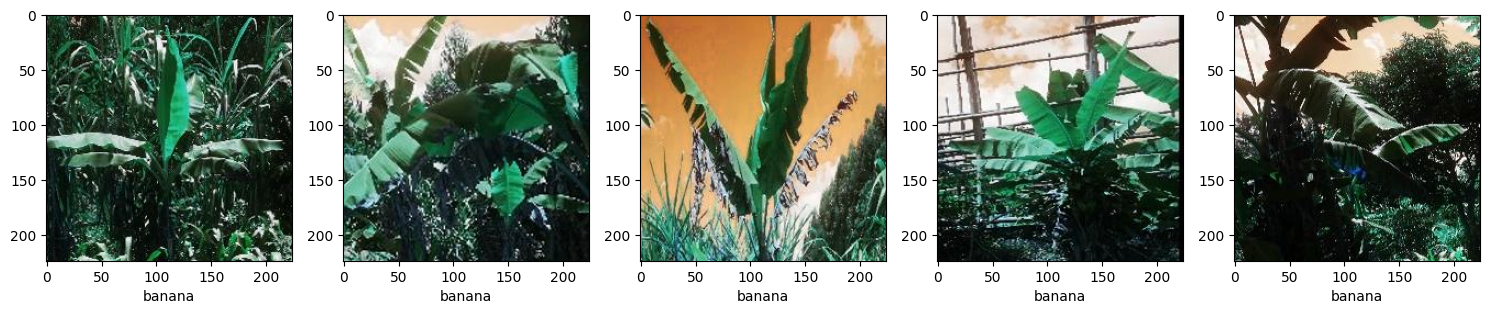

In [7]:
plt.figure(figsize = (15,15));
for i,j in enumerate(train_img):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

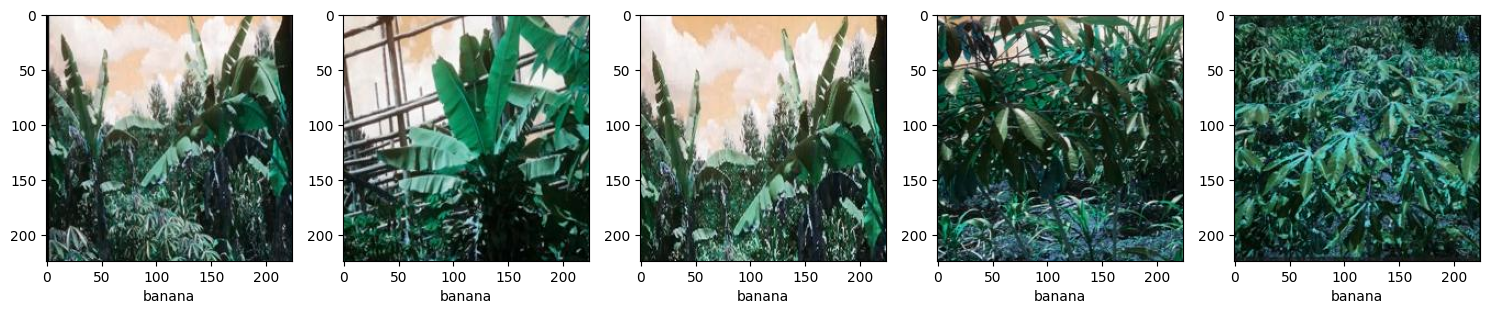

In [8]:
plt.figure(figsize = (15,15));
for i,j in enumerate(test_img):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

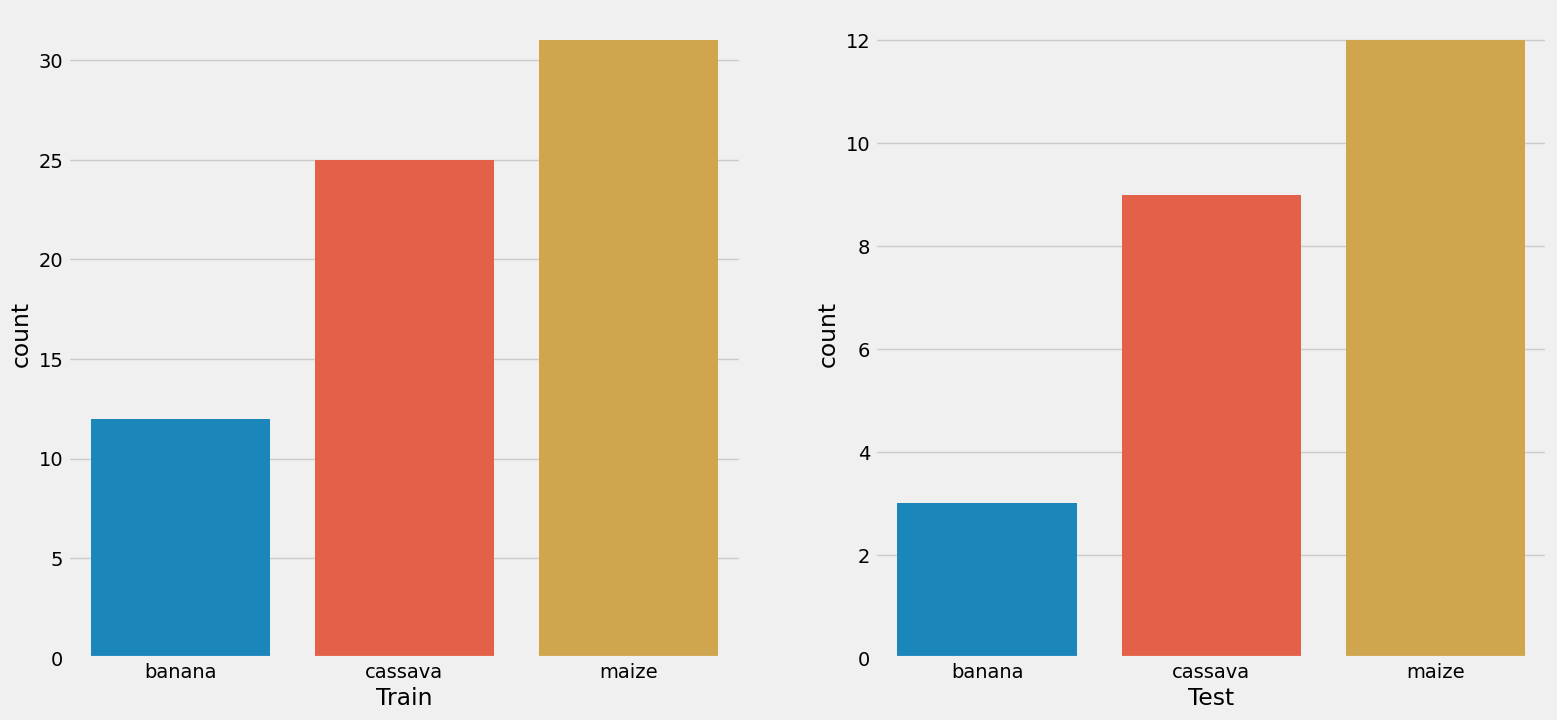

In [21]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

## Data Augmentation

In [9]:
data_generator=ImageDataGenerator(preprocessing_function=preprocess_input)

In [10]:
train_gen = data_generator.flow_from_directory(
    directory = 'E:/python/Computer vision exam/images/training',
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    #subset='training'
)

Found 68 images belonging to 3 classes.


In [11]:
valid_gen = data_generator.flow_from_directory(
    directory = 'E:/python/Computer vision exam/images/testing',
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    #subset='validation'
)

Found 24 images belonging to 3 classes.


In [12]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

In [13]:
model = Sequential()
model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
))
model.add(Dense(64, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu',kernel_regularizer='l2'))
model.add(Dense(256,activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu',kernel_regularizer='l2'))
model.add(Dense(128,activation='relu',kernel_regularizer='l2'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(class_size,activation='softmax'))
model.layers[0].trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
red_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.3,patience=3,min_lr=1e-2)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                        

In [15]:
fit_history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    validation_data=valid_gen,
    validation_steps=len(valid_gen),
    epochs = 10,
    verbose = 1,
    callbacks=[red_lr]
)

Epoch 1/10
5/5 [==============================] - 34s 6s/step - loss: 9.0829 - accuracy: 0.4706 - val_loss: 8.5034 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 25s 5s/step - loss: 8.2140 - accuracy: 0.7353 - val_loss: 8.2413 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 24s 5s/step - loss: 8.0150 - accuracy: 0.7353 - val_loss: 8.0415 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 24s 5s/step - loss: 7.6599 - accuracy: 0.8676 - val_loss: 7.8975 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 24s 6s/step - loss: 7.3971 - accuracy: 0.9265 - val_loss: 7.7361 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 25s 5s/step - loss: 7.3422 - accuracy: 0.9265 - val_loss: 7.5641 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/10
5/5 [==============================] - 25s 6s/step - loss: 7.0549 - accuracy: 0.970

In [16]:
model.evaluate(valid_gen, verbose=1)

2/2 [==============================] - 6s 2s/step - loss: 6.8387 - accuracy: 1.0000


[6.838659763336182, 1.0]

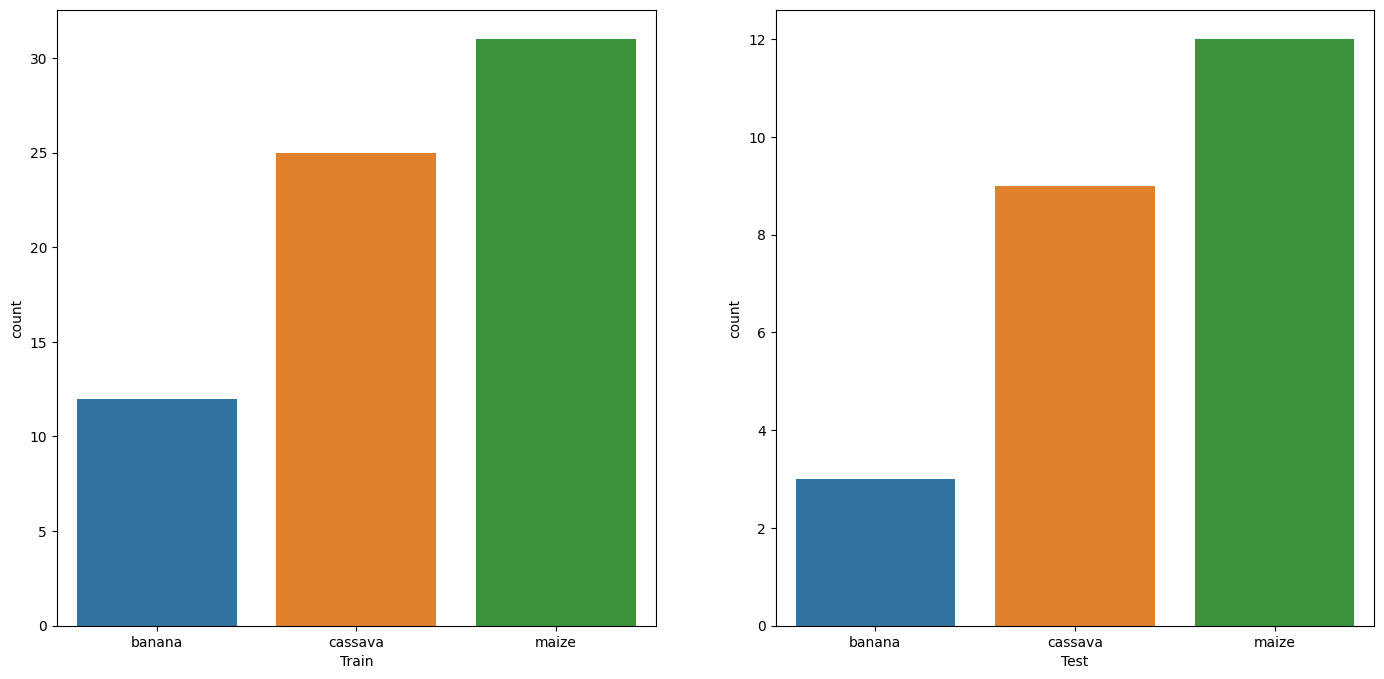

In [17]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

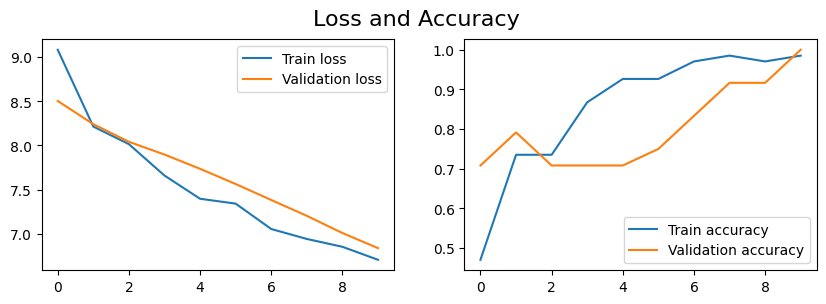

In [18]:
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(fit_history.epoch, fit_history.history["loss"], label="Train loss")
ax[0].plot(fit_history.epoch, fit_history.history["val_loss"], label="Validation loss")
ax[0].legend()
ax[1].plot(fit_history.epoch, fit_history.history["accuracy"], label="Train accuracy")
ax[1].plot(fit_history.epoch, fit_history.history["val_accuracy"], label="Validation accuracy")
ax[1].legend()
fig.suptitle('Loss and Accuracy', fontsize=16)
plt.show()

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize=(20, 8))
    plt.style.use('fivethirtyeight')
    epochs = range(1, len(tr_acc) + 1)
    loss_label = f'best epoch = {str(index_loss + 1)}'
    acc_label = f'best epoch = {str(index_acc + 1)}'

    plt.subplot(1, 2, 1)
    plt.plot(epochs, tr_loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

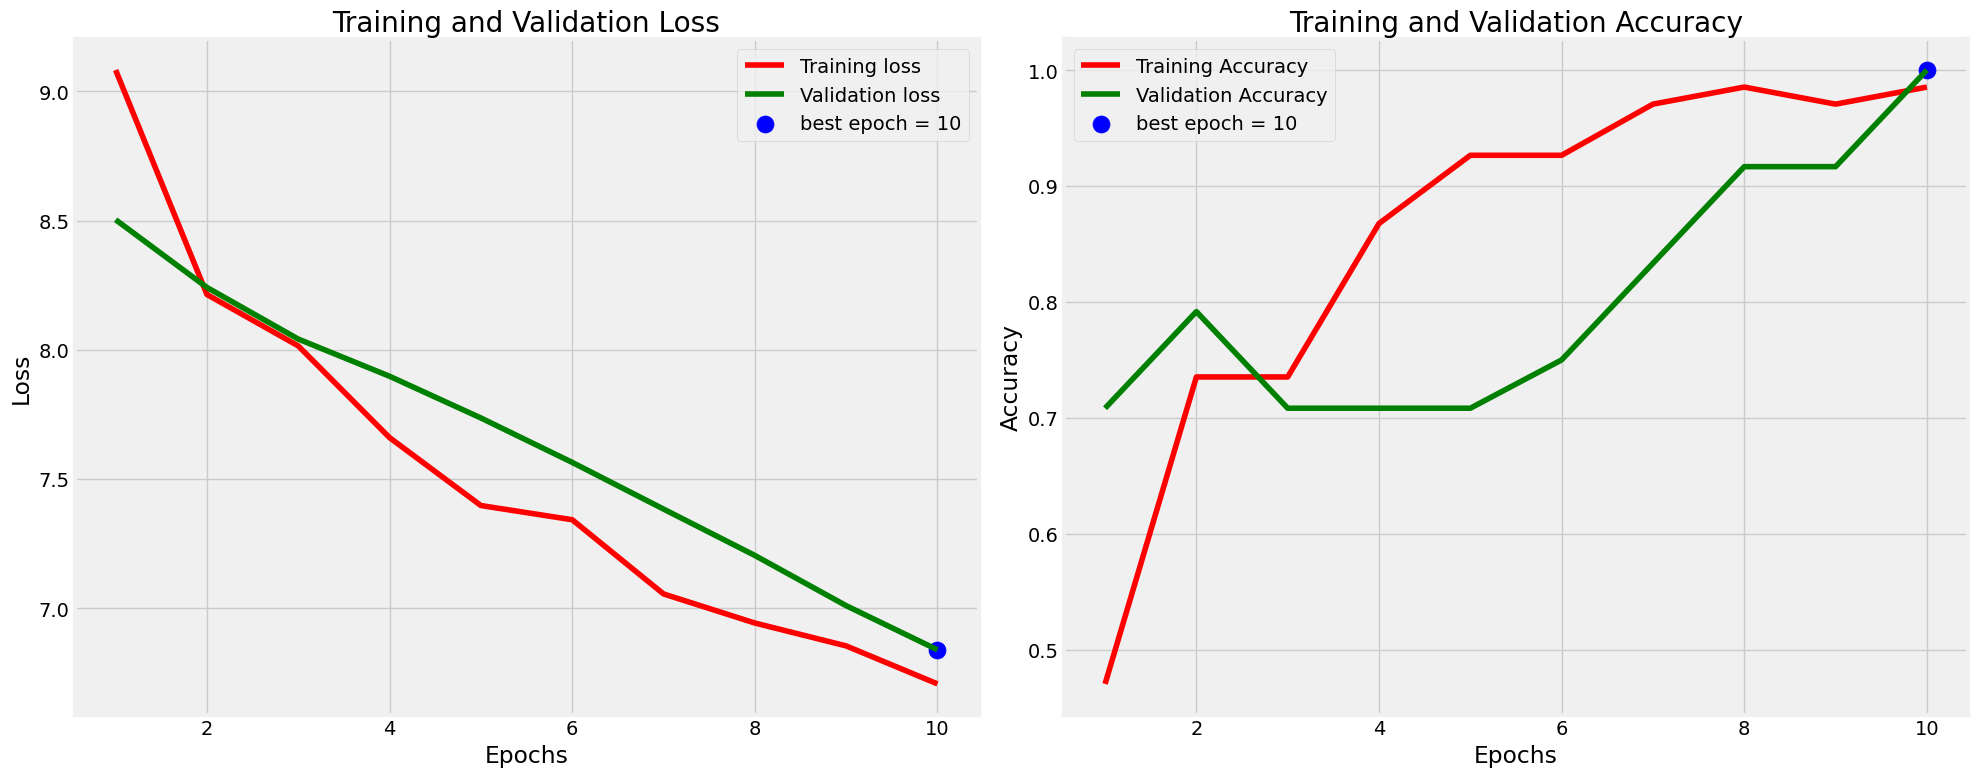

In [20]:
plot_training(fit_history)